Import modules

In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import random
from tensorflow.keras import layers, Sequential

Load data from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataPath = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'data')
print(os.listdir(dataPath))

['Download.ipynb', 'train.npz']


In [4]:
idx = random.sample(range(2000), 500)
npz_data = np.load(os.path.join(dataPath, 'train.npz'))

train_x = npz_data['train_y'][idx]/255.
train_y = npz_data['train_x'][idx]/255.

del npz_data

In [5]:
train_x.shape

(500, 360, 640)

In [6]:
train_y.shape

(500, 360, 640, 3)

Visualize train set

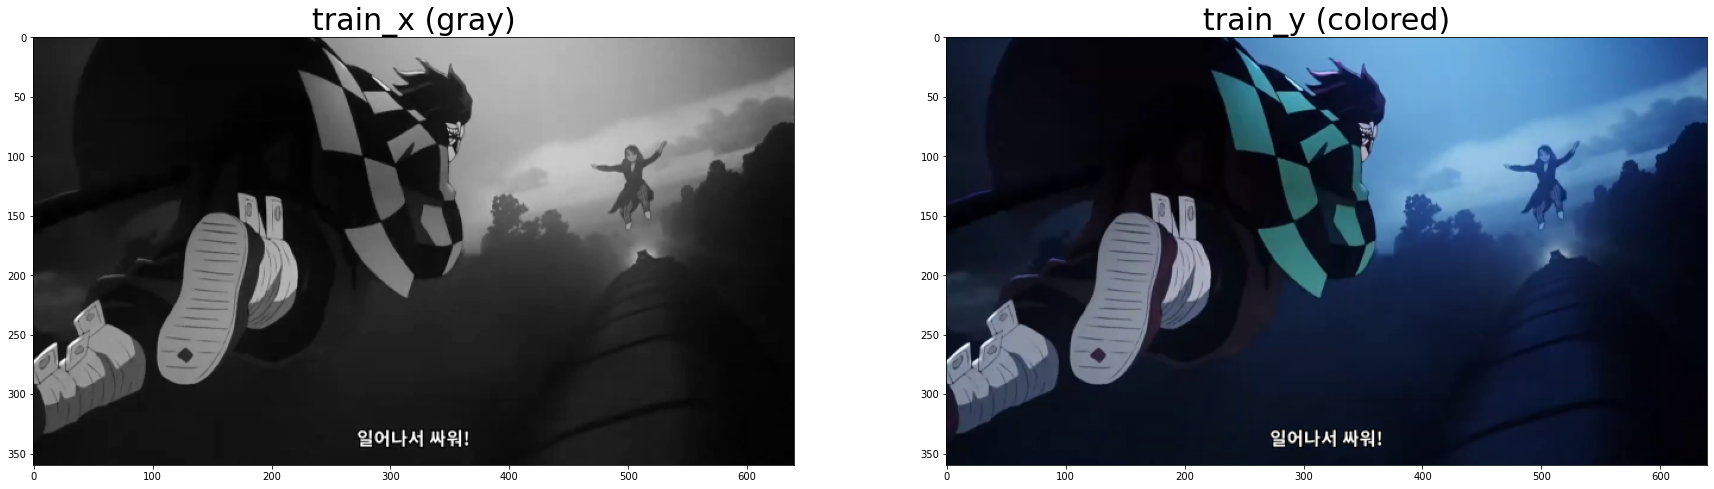

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(30,60))

ax[0].imshow(train_x[50], cmap = 'gray')        
ax[0].set_title('train_x (gray)', fontsize=30)

ax[1].imshow(train_y[50])                       
ax[1].set_title('train_y (colored)', fontsize=30)

plt.show()

numpy ---> Tensor

In [8]:
train_x = tf.convert_to_tensor(train_x, dtype = tf.float64)
train_y = tf.convert_to_tensor(train_y, dtype = tf.float64)
train_x = tf.expand_dims(
    train_x, axis = -1, name=None
)

In [9]:
train_x.shape

TensorShape([500, 360, 640, 1])

In [10]:
train_y.shape

TensorShape([500, 360, 640, 3])

Hyper parameters

In [11]:
N_EPOCH = 100
BATCH_SIZE = 32

DataLoader

In [12]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y)).shuffle(len(train_x)).batch(BATCH_SIZE)
# test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y)).batch(BATCH_SIZE)

del train_x, train_y#, test_x, test_y

# Make Model

In [13]:
import numpy as np
from tensorflow.keras import layers, Sequential

Auto Encoder

In [74]:
model = Sequential(
    [
      # encoder
      layers.Conv2D(3, (3,3), (2,2), activation='relu', padding='same', input_shape=(360, 640, 1)),
      layers.Conv2D(32, (6,6), (5,5), activation='relu', padding='same'),
      layers.Conv2D(64, (3,3), (2,2), activation='relu', padding='same'),     
     layers.Conv2D(128, (3,3), (2,2), activation='relu', padding='same'),
   
      # decoder
     layers.Conv2DTranspose(256, (3,3), (2,2), activation ='relu', padding='same'),
      layers.Conv2DTranspose(128, (3,3), (2,2), activation ='relu', padding='same'),
      layers.Conv2DTranspose(32, (6,6), (5,5), activation ='relu', padding='same'),
      layers.Conv2DTranspose(3, (3,3), (2,2), activation ='relu', padding='same'),

    ]
)

In [75]:
model.compile(optimizer = 'adam', loss='mse')

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 180, 320, 3)       30        
                                                                 
 conv2d_12 (Conv2D)          (None, 36, 64, 32)        3488      
                                                                 
 conv2d_13 (Conv2D)          (None, 18, 32, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 16, 128)        73856     
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 18, 32, 256)      295168    
 Transpose)                                                      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 36, 64, 128)      295040    
 Transpose)                                           

# Train

In [77]:
history = model.fit(train_ds,
      batch_size = BATCH_SIZE,
      epochs = N_EPOCH,
      verbose = 1)

Epoch 1/100
16/16 [==============================] - 10s 420ms/step - loss: 0.1176
Epoch 2/100
16/16 [==============================] - 5s 338ms/step - loss: 0.0565
Epoch 3/100
16/16 [==============================] - 5s 313ms/step - loss: 0.0310
Epoch 4/100
16/16 [==============================] - 5s 313ms/step - loss: 0.0229
Epoch 5/100
16/16 [==============================] - 5s 314ms/step - loss: 0.0203
Epoch 6/100
16/16 [==============================] - 5s 316ms/step - loss: 0.0191
Epoch 7/100
16/16 [==============================] - 5s 317ms/step - loss: 0.0196
Epoch 8/100
16/16 [==============================] - 5s 316ms/step - loss: 0.0179
Epoch 9/100
16/16 [==============================] - 5s 316ms/step - loss: 0.0173
Epoch 10/100
16/16 [==============================] - 5s 312ms/step - loss: 0.0172
Epoch 11/100
16/16 [==============================] - 5s 312ms/step - loss: 0.0172
Epoch 12/100
16/16 [==============================] - 5s 325ms/step - loss: 0.0162
Epoch 13/100

# History

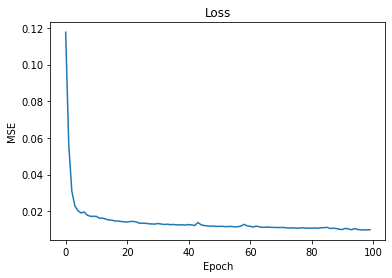

In [78]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

# Inference

In [93]:
sample_batch = next(iter(train_ds))

sample_train_x = sample_batch[0]
sample_train_y = sample_batch[1]
sample_predicted = model(sample_train_x)

sample_train_x = sample_train_x[0].numpy()
sample_train_y = sample_train_y[0].numpy()
sample_predicted = sample_predicted[0].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


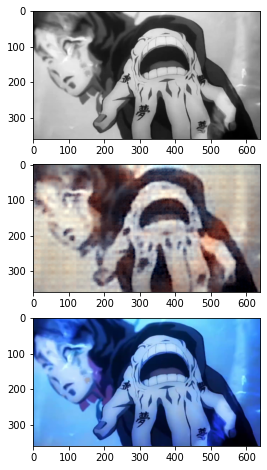

In [94]:
fig, ax = plt.subplots(3, figsize = (16, 8))


ax[0].imshow(sample_train_x[:, :, 0], cmap = 'gray')
ax[1].imshow(sample_predicted)
ax[2].imshow(sample_train_y)

plt.show()